# Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Iris.csv')
X = dataset.iloc[:, 1:-1].values 
y = dataset.iloc[:, -1].values 

# Taking care of missing data

In [4]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(X[:, :])
X[:, :] = imputer.transform(X[:, :])

## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the Decision Tree Classifier on the Training set

In [6]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

## Predicting the Test set results

In [7]:
y_pred = classifier.predict(X_test)

Print the classification report

In [10]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Print the confusion matrix

In [11]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


## Visualizing the Decision Tree

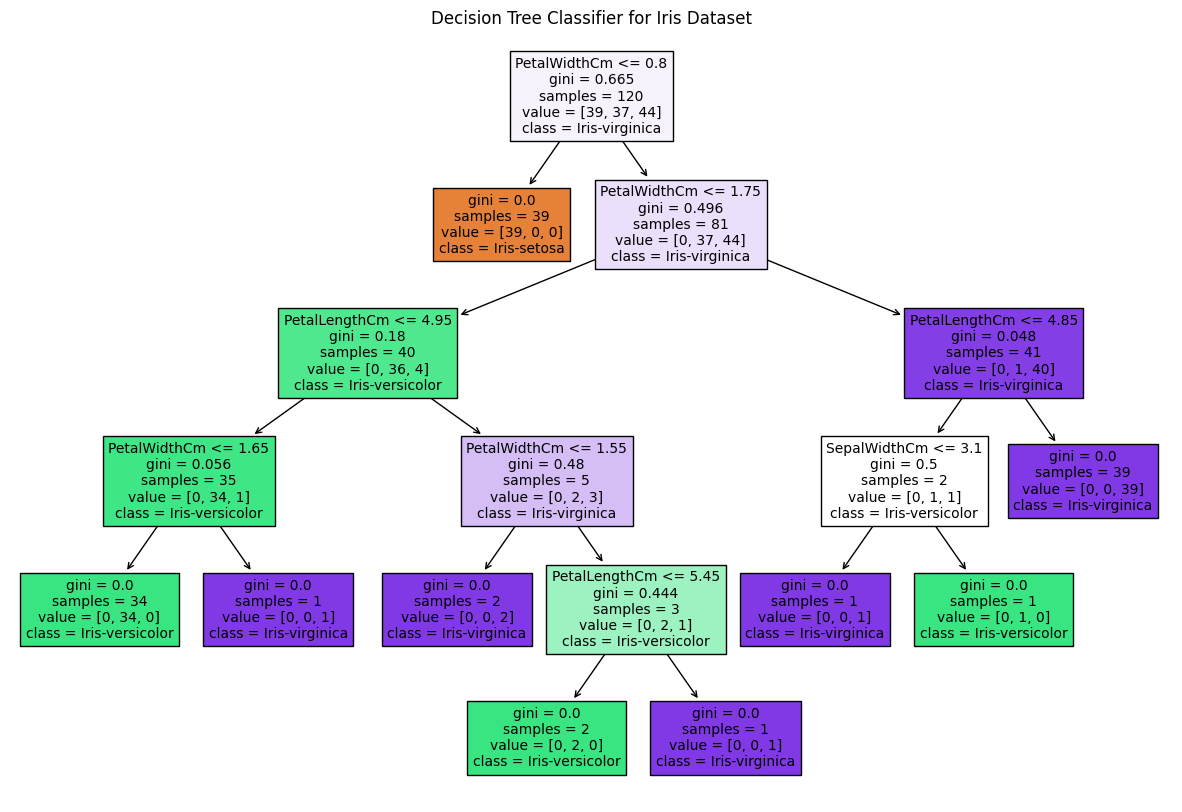

In [12]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(classifier, filled=True, feature_names=dataset.columns[1:5], class_names=classifier.classes_)
plt.title('Decision Tree Classifier for Iris Dataset')
plt.show()
